Exercise 3

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2)

In [3]:
def grad(x):
    return 2*x

def cost(x):
    return x**2

def myGD1(eta, x0):
    x = [x0]
    y = [x0**2]
    for it in range(100):
        x_new = x[-1] - eta*grad(x[-1])
        if abs(grad(x_new)) < 1e-3:
            break
        x.append(x_new)
        y.append(y)
    return (x,y,it)

def draw(x,y):
    x_plot = np.linspace(-5,5,100)
    plt.plot(x_plot,cost(x_plot),label="$x^2$")
    plt.scatter(x,y,c="r")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show

In [ ]:
(x1,y1,it1) = myGD1(.2, 2)
print('Solution x1 = %f, cost = %f, obtained after %d iterations'%(x1[-1], cost(x1[-1]), it1))
draw(x1,y1)

In [ ]:
(x2,y2,it2) = myGD1(1, 2)
print('Solution x1 = %f, cost = %f, obtained after %d iterations'%(x2[-1], cost(x2[-1]), it2))
draw(x2,y2)

Exercise 4

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#load data
url = 'https://raw.githubusercontent.com/nttuan8/DL_Tutorial/master/L2/dataset.csv'
data = pd.read_csv(url, error_bad_lines=False).values

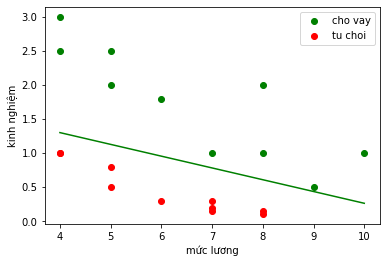

In [143]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

N,d = data.shape
x = data[:, 0:d-1].reshape(-1,d-1)
y = data[:,-1].reshape(-1,1)

x_yes = x[y[:,0]==1]
x_no = x[y[:,0]==0]

plt.scatter(x_yes[:,0],x_yes[:,1],c = "g",label = "cho vay")
plt.scatter(x_no[:,0],x_no[:,1],c = "r",label = "tu choi")
plt.legend(loc=1)
plt.xlabel('mức lương')
plt.ylabel('kinh nghiệm')

x = np.hstack((np.ones((N,1)),x)) #tại sao cái này phải có 2 ngoặc
w = np.array([0.,0.1,0.1]).reshape(-1,1) #khởi tạo giá trị của w

iter = 1000
cost = np.zeros((iter,1))
learning = 0.01

for i in range(1,iter):
    y_predict = sigmoid(np.dot(x,w))
    cost[i] = -np.sum(np.multiply(y,np.log(y_predict))+np.multiply(1-y,np.log(1-y_predict)))
    w = w - learning*np.dot(x.T,y_predict - y)    
t = 0.5
plt.plot((4, 10),(-(w[0]+4*w[1]+ np.log(1/t-1))/w[2], -(w[0] + 10*w[1]+ np.log(1/t-1))/w[2]), 'g')
plt.show()

In [164]:
x1 = np.array([1,2,3])
y1 = sigmoid(np.dot(x1,w))
print("in case salary %d and time %d, the percentage to accept is %f"%(x1[1],x1[2],y1))

in case salary 2 and time 3, the percentage to accept is 0.992852


In [165]:
x2 = np.array([1,1,8])
y2 = sigmoid(np.dot(x2,w))
print("in case salary %d and time %d, the percentage to accept is %f"%(x2[1],x2[2],y2))

in case salary 1 and time 8, the percentage to accept is 1.000000


In [166]:
x3 = np.array([1,5,5])
y3 = sigmoid(np.dot(x3,w))
print("in case salary %d and time %d, the percentage to accept is %f"%(x3[1],x3[2],y3))

in case salary 5 and time 5, the percentage to accept is 0.999999
